In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Yumna-HP/Desktop/ML_project/train_data.csv')
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


# 1 - Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [5]:
df.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [6]:
df.groupby('Stay').count()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
Stay,,,,,,,,,,,,,,,
0-10,23604,23604,23604,23604,23604,23604,23604,23604,23602,23252,23604,23604,23604,23604,23604
11-20,78139,78139,78139,78139,78139,78139,78139,78139,78120,77114,78139,78139,78139,78139,78139
21-30,87491,87491,87491,87491,87491,87491,87491,87491,87454,86353,87491,87491,87491,87491,87491
31-40,55159,55159,55159,55159,55159,55159,55159,55159,55137,54334,55159,55159,55159,55159,55159
41-50,11743,11743,11743,11743,11743,11743,11743,11743,11735,11549,11743,11743,11743,11743,11743
51-60,35018,35018,35018,35018,35018,35018,35018,35018,35005,34476,35018,35018,35018,35018,35018
61-70,2744,2744,2744,2744,2744,2744,2744,2744,2740,2702,2744,2744,2744,2744,2744
71-80,10254,10254,10254,10254,10254,10254,10254,10254,10250,10100,10254,10254,10254,10254,10254
81-90,4838,4838,4838,4838,4838,4838,4838,4838,4837,4762,4838,4838,4838,4838,4838


In [7]:
stays = []
for i in range(len(df.Stay.unique())):
    stays.append(df.Stay.value_counts()[i])

Stays = pd.DataFrame((df.Stay.unique(), stays), index=['Days', 'Counts']).transpose()
Stays

,Days,Counts
0,0-10,87491
1,41-50,78139
2,31-40,55159
3,11-20,35018
4,51-60,23604
5,21-30,11743
6,71-80,10254
7,More than 100 Days,6683
8,81-90,4838
9,61-70,2765


In [8]:
def plot_box(label):
    plt.figure(figsize=(5,5), dpi=100)
    sns.boxplot(x=label, data=df)
    plt.title(f'{label}')
    if len(df[label]) > 5:
        plt.xticks(rotation=90)

Some of them are actually categorical taking numeric values

In [9]:
def plot_count(label, rotate=False):
    plt.figure(figsize=(6,6), dpi=100)
    sns.countplot(x=label, data=df, order=df[label].value_counts().index, hue='Stay')
    plt.title(f'{label}')
    if rotate:
        plt.xticks(rotation=90)

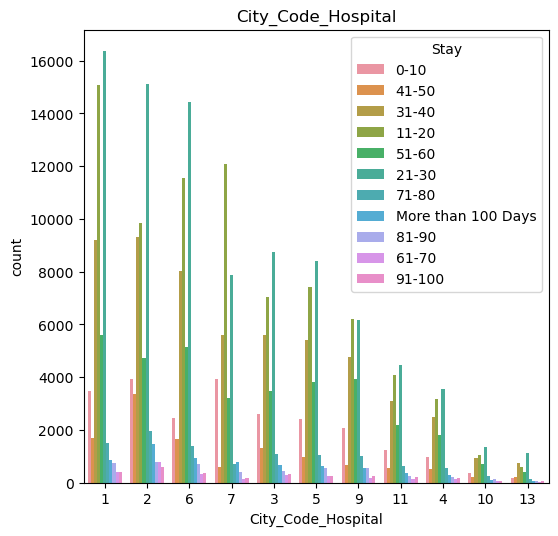

In [10]:
plot_count('City_Code_Hospital')

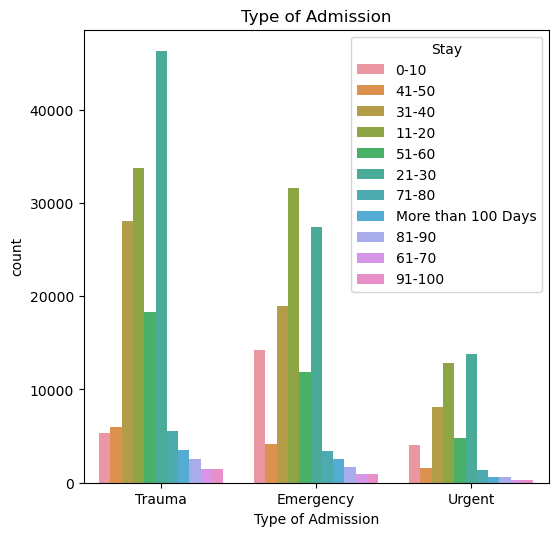

In [11]:
plot_count('Type of Admission')

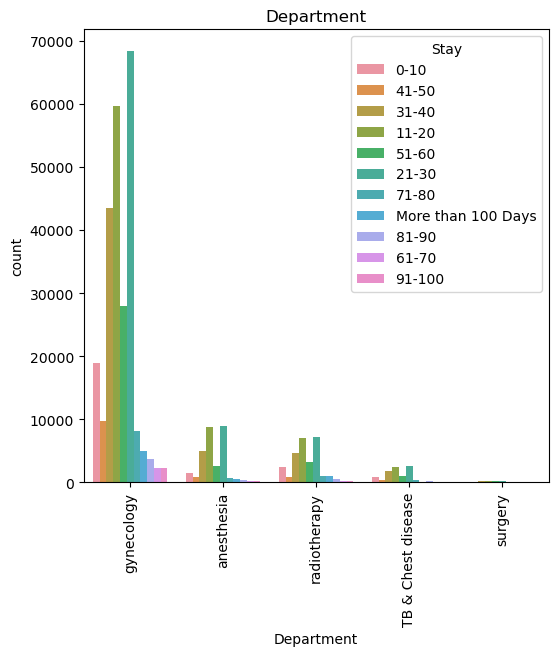

In [12]:
plot_count('Department', rotate=True)

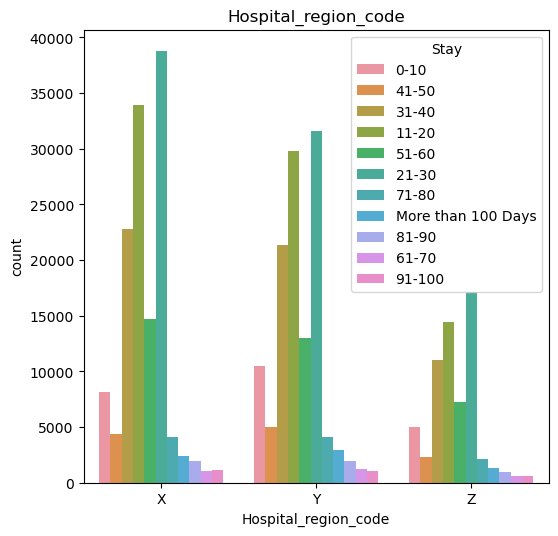

In [13]:
plot_count('Hospital_region_code')

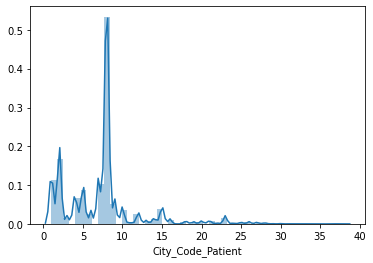

In [14]:
sns.distplot(df['City_Code_Patient'])

Outliers

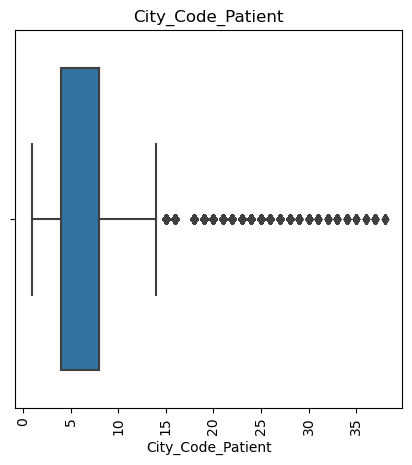

In [15]:
plot_box('City_Code_Patient')

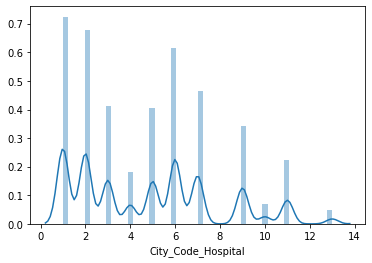

In [16]:
sns.distplot(df['City_Code_Hospital'])

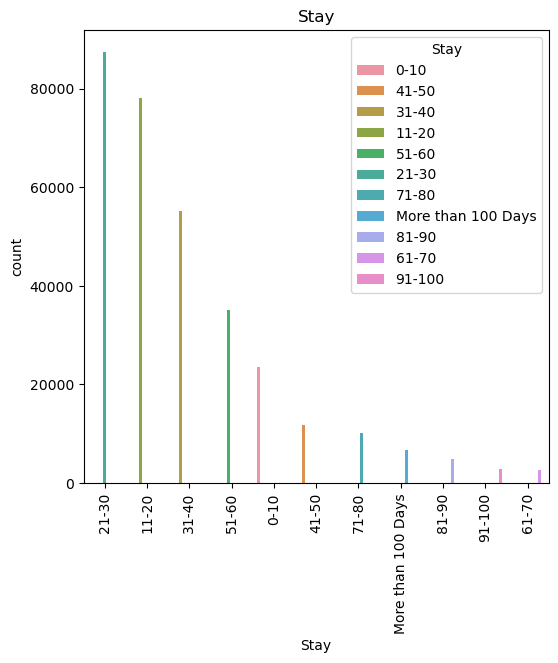

In [17]:
plot_count('Stay', rotate=True)

#### Correlation

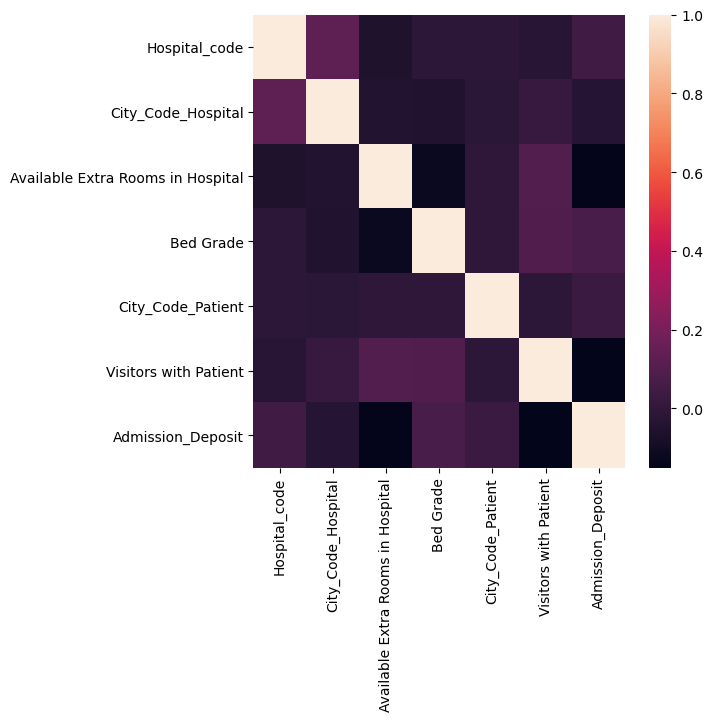

In [18]:
plt.figure(figsize=(6,6), dpi=100)
sns.heatmap(df.corr())

<Figure size 2000x2000 with 0 Axes>

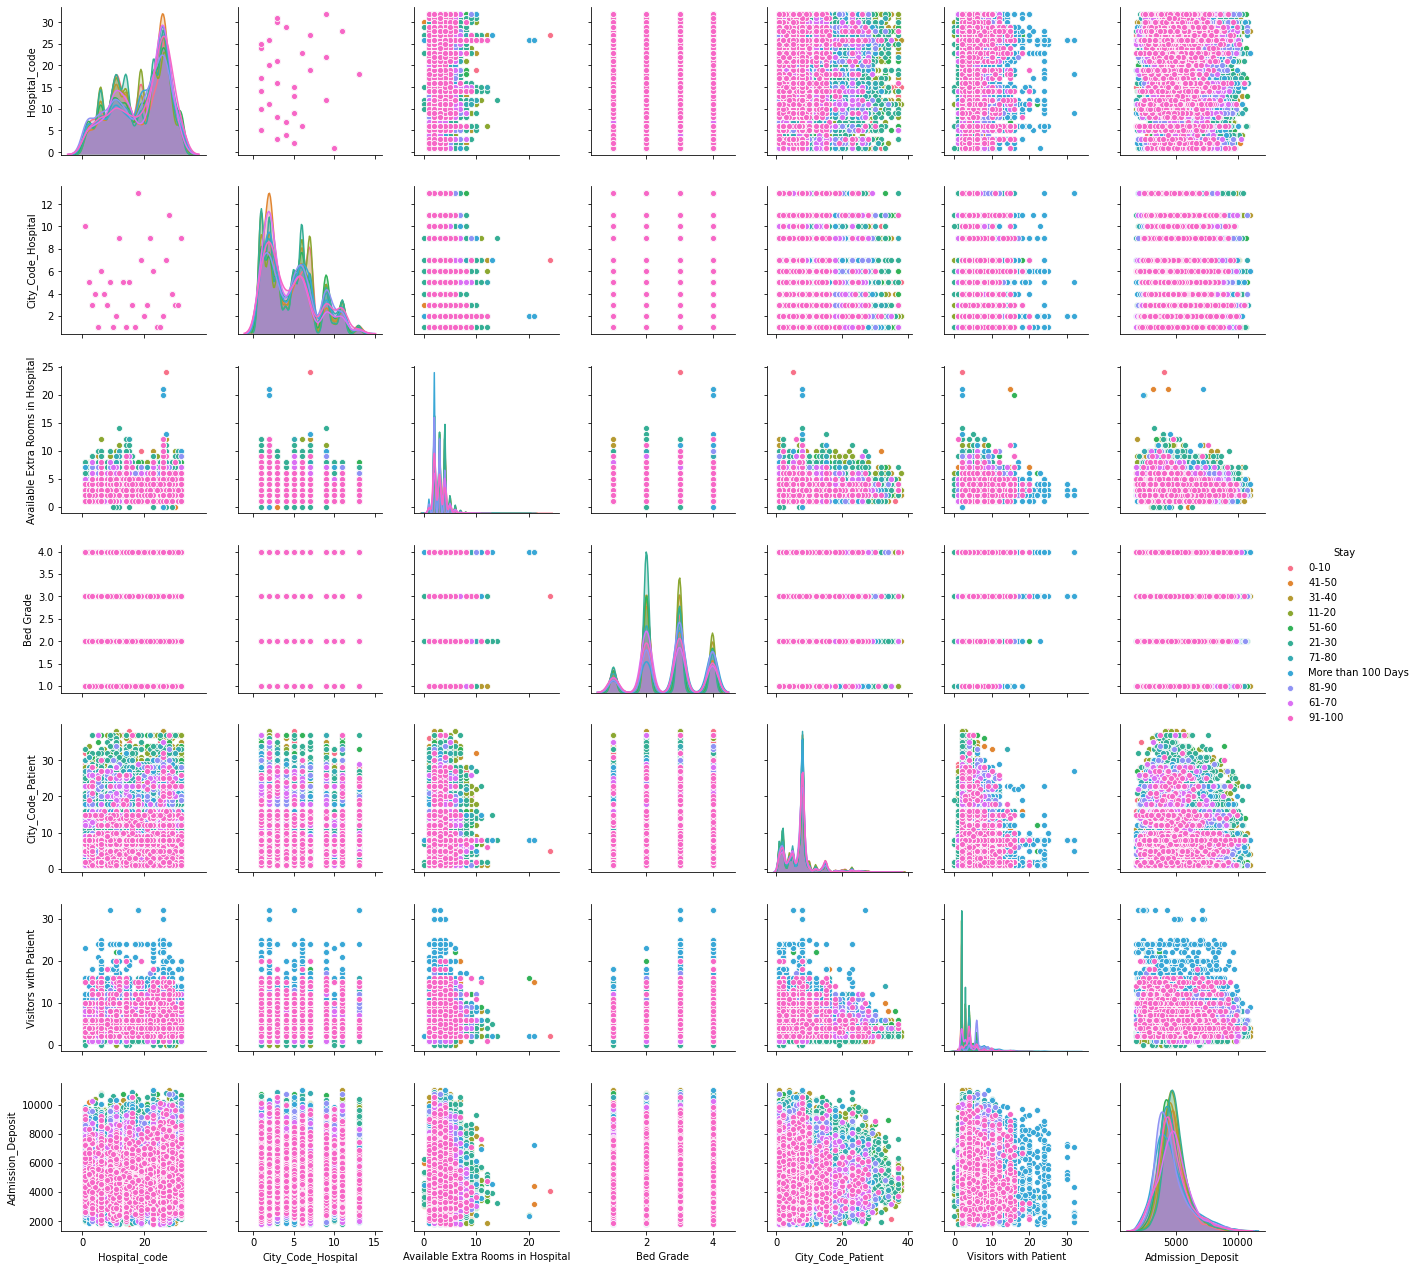

In [19]:
plt.figure(figsize=(10,10), dpi=200)
sns.pairplot(df, hue='Stay')

## 2 - Data Preprocessing

### 2.1: Data Wrangling

#### 2.1.1: Missing Data

In [20]:
df[df.duplicated()]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
576,14,a,1,X,4,gynecology,Q,E,2.0,9.0,Trauma,Moderate,4,31-40,4414.0,21-30
1179,28,b,11,X,2,gynecology,R,F,4.0,8.0,Trauma,Moderate,4,81-90,4944.0,31-40
2356,13,a,5,Z,4,anesthesia,R,F,4.0,1.0,Trauma,Extreme,3,41-50,4025.0,71-80
2358,23,a,6,X,2,anesthesia,R,F,2.0,1.0,Urgent,Extreme,6,41-50,3538.0,51-60
15738,23,a,6,X,2,gynecology,R,F,3.0,8.0,Urgent,Moderate,10,51-60,4469.0,More than 100 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295923,4,a,4,X,2,gynecology,R,F,3.0,10.0,Emergency,Extreme,2,61-70,4151.0,21-30
298233,23,a,6,X,2,gynecology,Q,F,4.0,8.0,Trauma,Minor,8,51-60,4181.0,More than 100 Days
298234,23,a,6,X,2,gynecology,Q,F,4.0,8.0,Trauma,Minor,8,51-60,4181.0,More than 100 Days
304087,22,g,9,Y,1,TB & Chest disease,S,B,1.0,6.0,Urgent,Moderate,4,31-40,5317.0,21-30


In [21]:
def find_missing():
    missing = (100 * df.isnull().sum() / len(df)).sort_values()
    missing = missing[missing>0].sort_values()
    return missing

In [22]:
def plot_missing():
    try:
        missing = find_missing()
        plt.figure(figsize=(4,4),dpi=100)
        sns.barplot(x=missing.index, y=missing)
        plt.xticks(rotation=90)
    except ValueError as e:
        print('No Missing Values!')

In [23]:
missing = find_missing()
missing

Bed Grade            0.035486
City_Code_Patient    1.423197
dtype: float64

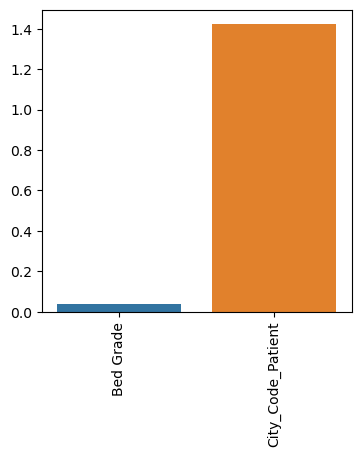

In [24]:
plot_missing()

<h5>Bed Grade</h5>

In [25]:
print(df['Bed Grade'].value_counts())

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64


In [26]:
_, mode = df.groupby('Hospital_code')['Bed Grade'].value_counts().idxmax()
mode

2.0

In [27]:
df['Bed Grade'] = df['Bed Grade'].fillna(2.0)

<h5>City Code</h5>

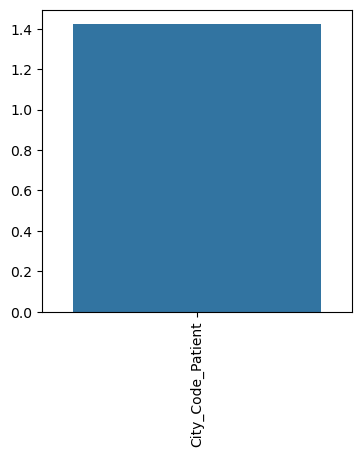

In [28]:
plot_missing()

In [29]:
df.dropna(axis=0, inplace=True)

In [30]:
missing = plot_missing()

No Missing Values!


<Figure size 400x400 with 0 Axes>

#### 2.1.2: Outliers

I think we need to only worry about outliers in the NUMERIC columns.

In [31]:
from scipy import stats

In [32]:
numeric_cols = df.select_dtypes(include=np.number)
correct_num = numeric_cols.drop(['Hospital_code', 'City_Code_Hospital', 'City_Code_Patient', 'Bed Grade'], axis=1)
correct_num.columns

Index(['Available Extra Rooms in Hospital', 'Visitors with Patient',
       'Admission_Deposit'],
      dtype='object')

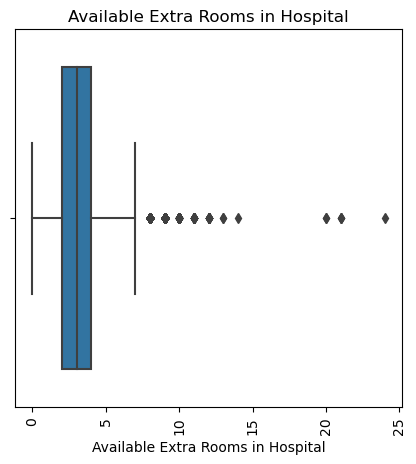

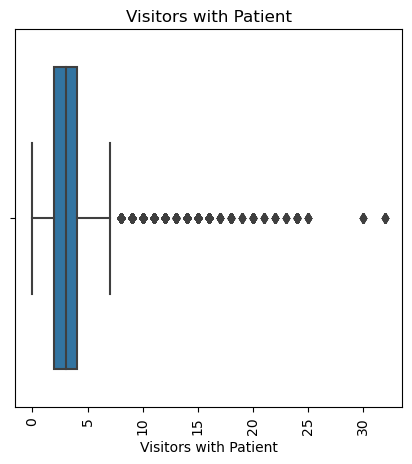

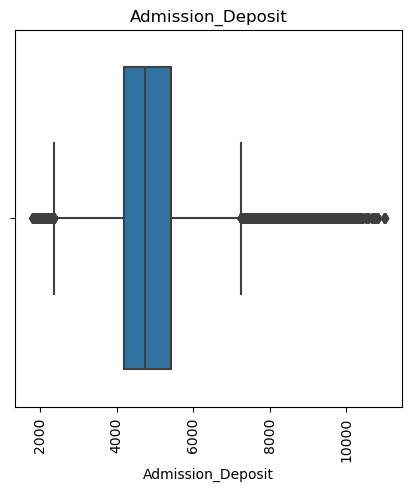

In [33]:
for c in correct_num.columns:
    plot_box(c)

In [34]:
# def outliers(label):
#     q75, q25 = np.percentile(df[label], [75,25])
#     IQR = q75 - q25
#     extreme_lower = q25 - 3 * IQR
#     extreme_upper = q75 + 3 * IQR
#     df_filtered = df[(df[label]<extreme_upper) & (df[label]>extreme_lower)]
#     df_filtered = df_filtered[np.abs(df_filtered[f'{label}'] - df_filtered[f'{label}'].mean()) <= (3*df_filtered[f'{label}'].std())]
#
#     return df_filtered

def outliers(label):
    return df[(np.abs(stats.zscore(df[f'{label}'])) < 3)]

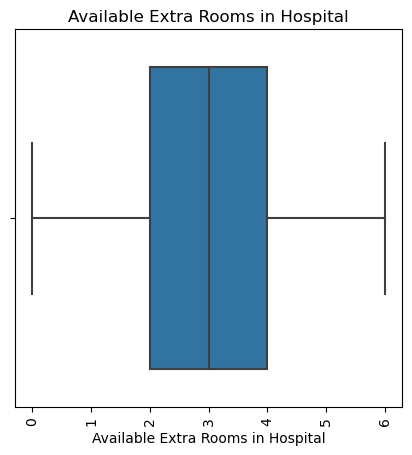

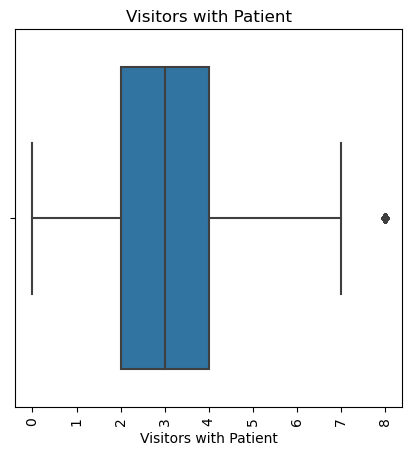

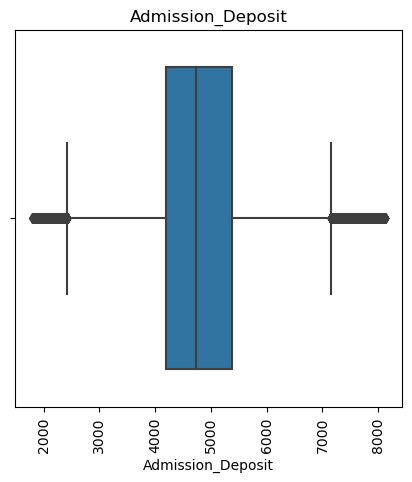

In [35]:
for c in correct_num.columns:
    df = outliers(c)
    plot_box(c)

## 2.2: Normalization

Some of the categorical columns take numerical values, so we need to handle them before we normalize the numeric columns

In [36]:
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

In [37]:
normalizer = Normalizer()
df['Admission_Deposit'] = df['Admission_Deposit'].apply(int)
correct_num.columns

Index(['Available Extra Rooms in Hospital', 'Visitors with Patient',
       'Admission_Deposit'],
      dtype='object')

In [38]:
scaled_features = df.copy()
features = scaled_features[correct_num.columns]
normalizer.fit(features.values)
features = normalizer.transform(features.values)
scaled_features[correct_num.columns] = features
scaled_features.head()

# ct = ColumnTransformer([
#     ('scaled', scaler, correct_num.columns)
# ] , remainder='passthrough')
# df = ct.fit_transform(df)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,0.000611,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,0.000407,51-60,1.0,0-10
1,2,c,5,Z,0.000336,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,0.000336,51-60,1.0,41-50
2,10,e,1,X,0.000421,anesthesia,S,E,2.0,7.0,Trauma,Extreme,0.000421,51-60,1.0,31-40
3,26,b,2,Y,0.000275,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,0.000275,51-60,1.0,41-50
4,26,b,2,Y,0.000360,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,0.000360,51-60,1.0,41-50


## 2.3: Category Encoding

In [39]:
categorical_features = df.select_dtypes(exclude=np.number)
categorical_features.head()

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
0,c,Z,radiotherapy,R,F,Emergency,Extreme,51-60,0-10
1,c,Z,radiotherapy,S,F,Trauma,Extreme,51-60,41-50
2,e,X,anesthesia,S,E,Trauma,Extreme,51-60,31-40
3,b,Y,radiotherapy,R,D,Trauma,Extreme,51-60,41-50
4,b,Y,radiotherapy,S,D,Trauma,Extreme,51-60,41-50


In [40]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[categorical_features.columns] = encoder.fit_transform(categorical_features)
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2.0,3,2.0,3,3.0,2.0,5.0,2.0,7.0,0.0,0.0,2,5.0,4911,0.0
1,2,2.0,5,2.0,2,3.0,3.0,5.0,2.0,7.0,1.0,0.0,2,5.0,5954,4.0
2,10,4.0,1,0.0,2,1.0,3.0,4.0,2.0,7.0,1.0,0.0,2,5.0,4745,3.0
3,26,1.0,2,1.0,2,3.0,2.0,3.0,2.0,7.0,1.0,0.0,2,5.0,7272,4.0
4,26,1.0,2,1.0,2,3.0,3.0,3.0,2.0,7.0,1.0,0.0,2,5.0,5558,4.0


In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [42]:
X = df.drop('Stay', axis=1)
y = df['Stay']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegressionCV

In [45]:
from sklearn.metrics import accuracy_score, classification_report
import time

In [47]:
for c in categorical_features.columns:
    df[c] = df[c].apply(int)

In [2]:
model = LogisticRegressionCV(max_iter=10000, verbose=1, n_jobs=-1, multi_class='multinomial')
t1 = time.perf_counter()
model.fit(X_train, y_train)
preds_logistic = model.predict(X_test)
t2 = time.perf_counter()
print('time: ', t2-t1)
print(accuracy_score(y_test, preds_logistic)*100)

NameError: name 'LogisticRegressionCV' is not defined

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree_model = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(tree_model, param_grid)
grid.fit(X_train, y_train)
preds_tree = grid.predict(X_test)
print(accuracy_score(y_test, preds_tree)*100)

KeyboardInterrupt: 

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test_final, y_train, y_test_final = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
# from sklearn.ensemble import RandomForestClassifier

# forest_model = RandomForestClassifier()
# param_grid = {'n_estimators':[64, 128, 256, 512],
#                            'max_features':[2,3,4],
#                            'bootstrap':[True, False],
#                            'oob_score':[True, False]}
# grid = GridSearchCV(forest_model, param_grid)
# grid.fit(X_train, y_train)
# preds_forest = grid.predict(X_test)
# print(accuracy_score(y_test, preds_forest))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forestVC = RandomForestClassifier()
modelVC1 = forestVC.fit(x_train, y_train) 
y_predVC = modelVC1.predict(x_test_final)
accuracy = accuracy_score(y_test_final, y_predVC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 37.91%


In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [53]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, y)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forestVC = RandomForestClassifier()
modelVC1 = forestVC.fit(x_train, y_train) 
y_predVC = modelVC1.predict(x_test_final)
accuracy = accuracy_score(y_test_final, y_predVC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.88%


In [192]:
XGmodel = GradientBoostingClassifier()
param_grid = {'n_estimators':[64, 128, 256, 512],
              'learning_rate':[0.001, 0.01, 0.05,0.1, 0.2],
              'max_depth':[3, 4, 5]}

grid = GridSearchCV(XGmodel, param_grid)
grid.fit(X_train, y_train)
xg_preds = grid.predict(X_test)
print(classification_report(y_test, xg_preds))

KeyboardInterrupt: 

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [194]:
ada_model = AdaBoostClassifier()
grid_param = {
    'n_estimators':[64, 128, 256, 512],
    'learning_rate':[0.001, 0.01, 0.05,0.1, 0.2]
}

grid = GridSearchCV(ada_model, grid_param)
grid.fit(X_train, y_train)
ada_preds = grid.predict(X_test)
print(accuracy_score(y_test, ada_preds))

KeyboardInterrupt: 

In [ ]:
def plot_error(model, param):
    error_rate_test, error_rate_train = [], []
    for n in range(1, 100):
        m = model(param=n)
        m.fit(X_train, y_train)
        test_preds = m.predict(X_test)
        train_preds = m.predict(X_train)
        error_rate_test.append(1-accuracy_score(y_test, test_preds))
        error_rate_train.append(1-accuracy_score(y_test, train_preds))
    plt.plot(range(1,100), error_rate)

In [44]:
error_rate = []
for n in range(1, len(X.columns)):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    error_rate.append(1-accuracy_score(y_test, preds))



NameError: name 'X' is not defined

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

Feature 0: 3312.313357
Feature 1: 1651.886389
Feature 2: 2046.618045
Feature 3: 863.436558
Feature 4: 970.655295
Feature 5: 41531.505362
Feature 6: 920433.525893
Feature 7: 1333.510946
Feature 8: 143.531628
Feature 9: 190.411645
Feature 10: 90.109072
Feature 11: 1086.722973
Feature 12: 550.132954
Feature 13: 393.864548
Feature 14: 98.108148
Feature 15: 886.318479
Feature 16: 86.827882
Feature 17: 221.715358
Feature 18: 103.682239
Feature 19: 5103.956058
Feature 20: 245.068008
Feature 21: 10222.794013
Feature 22: 56.901041
Feature 23: 2.598646
Feature 24: 628.052550
Feature 25: 2593.610469
Feature 26: 1911.712063
Feature 27: 457.878767
Feature 28: 228.279257
Feature 29: 3545.445688
Feature 30: 273.085491
Feature 31: 3075.738166
Feature 32: 269.402977
Feature 33: 569.544788
Feature 34: 400.702622
Feature 35: 164.429902
Feature 36: 55.308383
Feature 37: 70.720393
Feature 38: 98.341126
Feature 39: 401.411478
Feature 40: 654.170537
Feature 41: 100.359901


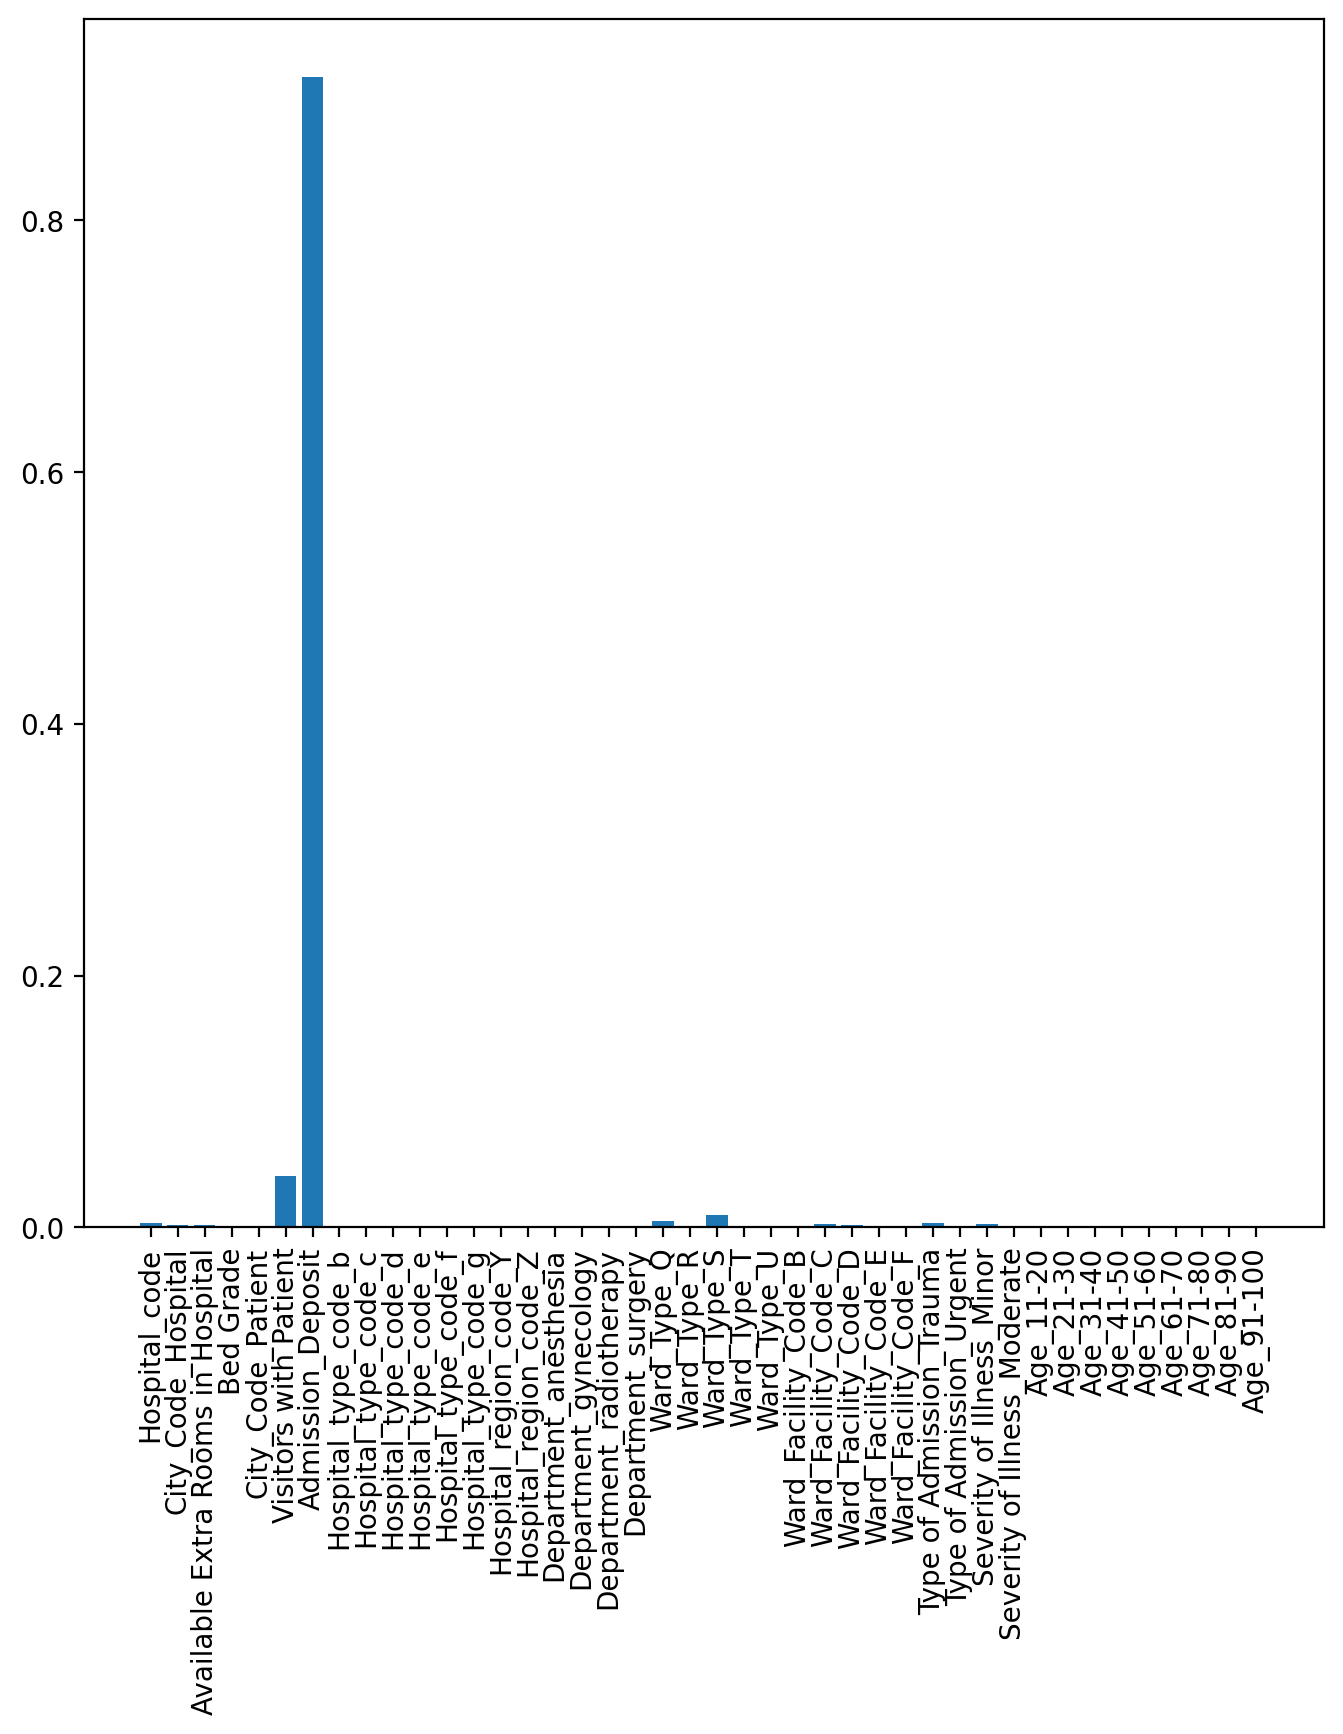

(array([[15.,  5.,  4., ...,  0.,  1.,  0.],
        [32.,  9.,  2., ...,  0.,  0.,  0.],
        [12.,  9.,  2., ...,  0.,  0.,  1.],
        ...,
        [27.,  7.,  3., ...,  0.,  1.,  0.],
        [ 3.,  3.,  2., ...,  0.,  0.,  0.],
        [32.,  9.,  3., ...,  0.,  0.,  0.]]),
 array([[ 8.,  3.,  2., ...,  0.,  1.,  1.],
        [28., 11.,  4., ...,  0.,  0.,  0.],
        [26.,  2.,  2., ...,  1.,  1.,  0.],
        ...,
        [10.,  1.,  2., ...,  0.,  0.,  1.],
        [ 3.,  3.,  3., ...,  0.,  0.,  0.],
        [14.,  1.,  3., ...,  0.,  1.,  0.]]),
 SelectKBest(k=15, score_func=<function chi2 at 0x000002119BBD6F70>))

<Figure size 432x288 with 0 Axes>

In [86]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=15)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    pyplot.figure(figsize=(8,8), dpi=200)
    
    feat_norm = fs.scores_ /sum(fs.scores_)
    
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
    
    pyplot.bar([X.columns[i]  for i in range(len(fs.scores_))], feat_norm)
    
    pyplot.xticks(rotation=90)
    pyplot.show()
    pyplot.savefig('plot_chi.png')
    #sns.barplot(x=features, y=fs.scores_,data=df)
    
    return X_train_fs, X_test_fs, fs

    
select_features(X_train, y_train, X_test)


In [65]:
print(df.columns)

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay'],
      dtype='object')


In [76]:
select_features(X_train, y_train, X_test):
fs = SelectKBest(score_func=chi2, k=15)
fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
print(type(fs.scores_))
      

<class 'numpy.ndarray'>
